<a href="https://colab.research.google.com/github/poojadiv1/Diabetes-Prediction-using-SVM/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
print(os.listdir())


['.config', 'diabetes.csv', 'sample_data']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


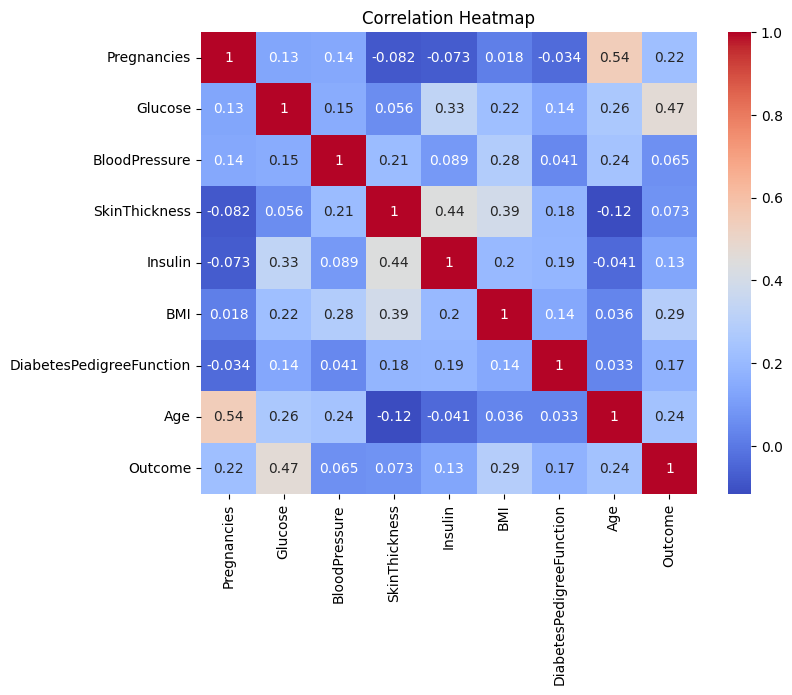

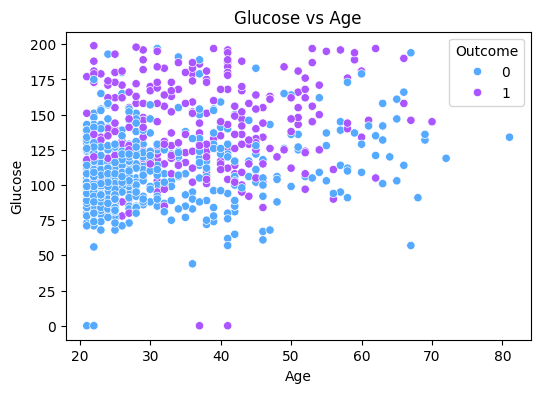

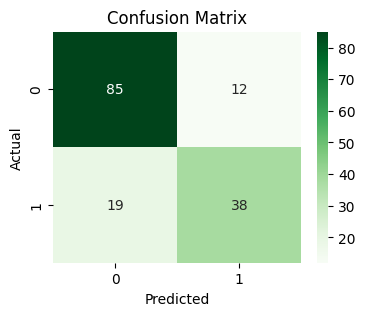

Dropdown(description='Gender:', options=('Female', 'Male'), value='Female')

IntSlider(value=0, description='Pregnancies:', layout=Layout(display='flex'), max=15)

IntSlider(value=50, description='Glucose:', max=200, min=50)

IntSlider(value=40, description='BP:', max=130, min=40)

IntSlider(value=0, description='Skin Thk:')

IntSlider(value=0, description='Insulin:', max=900, step=10)

FloatSlider(value=10.0, description='BMI:', max=60.0, min=10.0)

FloatSlider(value=0.0, description='DPF:', max=3.0, step=0.01)

IntSlider(value=18, description='Age:', min=18)

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

In [3]:
# --- Diabetes Prediction using SVM Classifier
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# --- Load Dataset ---
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv("diabetes.csv", names=columns, skiprows=1) # Skip the header row

display(HTML("<h3 style='color:#0066cc;'>📊 Dataset Overview</h3>"))
display(data.head())

# --- Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --- Glucose vs Age Plot ---
plt.figure(figsize=(6,4))
sns.scatterplot(x=data["Age"], y=data["Glucose"], hue=data["Outcome"], palette="cool")
plt.title("Glucose vs Age")
plt.show()

# --- Split & Train ---
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)

display(HTML(f"<h4 style='color:#009900;'>✅ Model trained successfully with accuracy: {acc:.2f}%</h4>"))

# --- Confusion Matrix ---
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Interactive Prediction ---
gender = widgets.Dropdown(options=["Female", "Male"], description="Gender:")
pregnancies = widgets.IntSlider(min=0, max=15, step=1, description="Pregnancies:")
glucose = widgets.IntSlider(min=50, max=200, step=1, description="Glucose:")
bp = widgets.IntSlider(min=40, max=130, step=1, description="BP:")
skin = widgets.IntSlider(min=0, max=100, step=1, description="Skin Thk:")
insulin = widgets.IntSlider(min=0, max=900, step=10, description="Insulin:")
bmi = widgets.FloatSlider(min=10, max=60, step=0.1, description="BMI:")
dpf = widgets.FloatSlider(min=0.0, max=3.0, step=0.01, description="DPF:")
age = widgets.IntSlider(min=18, max=100, step=1, description="Age:")
predict_btn = widgets.Button(description="Predict", button_style="success")

output = widgets.Output()

# --- Dynamic Visibility of Pregnancy Slider ---
def update_pregnancy_visibility(*args):
    if gender.value == "Male":
        pregnancies.layout.display = "none"
    else:
        pregnancies.layout.display = "flex"

gender.observe(update_pregnancy_visibility, "value")
update_pregnancy_visibility()

# --- Prediction Function ---
def on_predict_clicked(b):
    with output:
        clear_output()
        preg = pregnancies.value if gender.value == "Female" else 0
        values = [preg, glucose.value, bp.value, skin.value, insulin.value, bmi.value, dpf.value, age.value]
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)[0]
        prob = model.predict_proba(values_scaled)[0][pred]
        if pred == 1:
            color, msg = "red", "⚠️ You are likely to have Diabetes."
        else:
            color, msg = "green", "✅ You are likely *not* Diabetic."
        display(HTML(f"<div style='background:{color};color:white;padding:10px;border-radius:10px;font-size:16px'>{msg}</div>"))
        print(f"Model Accuracy: {acc:.2f}%")
        print(f"Prediction Confidence: {prob*100:.2f}%")

predict_btn.on_click(on_predict_clicked)

# --- Display UI ---
display(HTML("<h2 style='color:#0066cc;'>🩺 Diabetes Prediction using SVM</h2>"))
display(gender, pregnancies, glucose, bp, skin, insulin, bmi, dpf, age, predict_btn, output)